In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
cases = pd.read_json('https://data.cdc.gov/resource/9mfq-cb36.json?$limit=35000') # limit is required to pull more rows
# if len says at limit, increase the value

In [4]:
cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2021-07-15T00:00:00.000,CA,3918996,3760079.0,158917.0,5621,408.0,63909,63909.0,0.0,11,0.0,2021-07-15 00:00:00.000,Agree,Agree
1,2020-07-30T00:00:00.000,ME,3910,3497.0,413.0,22,2.0,123,122.0,1.0,2,0.0,2020-07-31 14:35:06.518,Agree,Agree
2,2020-06-15T00:00:00.000,WI,25480,22932.0,2548.0,185,11.0,700,694.0,6.0,2,0.0,2020-06-16 14:10:11.939,Agree,Agree
3,2020-07-31T00:00:00.000,ND,6602,6602.0,0.0,133,0.0,103,NaN,NaN,0,0.0,2020-08-01 14:38:12.337,Agree,Not agree
4,2020-04-25T00:00:00.000,AL,8610,8190.0,420.0,225,2.0,321,303.0,18.0,13,1.0,2021-08-02 13:40:18.560,Agree,Agree


In [5]:
len(cases)

33780

In [6]:
cases['state'].unique()

array(['CA', 'ME', 'WI', 'ND', 'AL', 'MI', 'CT', 'NC', 'NE', 'NV', 'MD',
       'IL', 'MO', 'ID', 'VI', 'NH', 'VT', 'MS', 'DE', 'IN', 'MT', 'WA',
       'GU', 'LA', 'SC', 'RI', 'KY', 'WY', 'MN', 'OR', 'DC', 'VA', 'NJ',
       'AZ', 'FSM', 'UT', 'MP', 'AR', 'PW', 'FL', 'MA', 'PR', 'TX', 'NYC',
       'GA', 'OK', 'AK', 'CO', 'AS', 'WV', 'HI', 'KS', 'RMI', 'IA', 'OH',
       'NM', 'NY', 'SD', 'PA', 'TN'], dtype=object)

In [7]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780 entries, 0 to 33779
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  33780 non-null  object        
 1   state            33780 non-null  object        
 2   tot_cases        33780 non-null  int64         
 3   conf_cases       16812 non-null  float64       
 4   prob_cases       16741 non-null  float64       
 5   new_case         33780 non-null  int64         
 6   pnew_case        29496 non-null  float64       
 7   tot_death        33780 non-null  int64         
 8   conf_death       17282 non-null  float64       
 9   prob_death       17282 non-null  float64       
 10  new_death        33780 non-null  int64         
 11  pnew_death       29436 non-null  float64       
 12  created_at       33780 non-null  datetime64[ns]
 13  consent_cases    30965 non-null  object        
 14  consent_deaths   30965 non-null  objec

In [8]:
cases['date'] = pd.to_datetime(cases['created_at'])

<AxesSubplot:xlabel='date'>

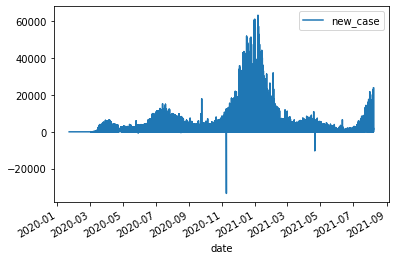

In [9]:
cases.plot('date','new_case')

In [10]:
la_case = cases[cases['state']=='LA'].copy()
la_case.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,date
6474,2020-11-06T00:00:00.000,LA,191715,NaN,NaN,870,0.0,6016,5787.0,229.0,21,0.0,2020-11-07 14:45:17.940,Not agree,Agree,2020-11-07 14:45:17.940
6485,2021-02-27T00:00:00.000,LA,428592,NaN,NaN,0,0.0,9587,8906.0,681.0,0,0.0,2021-02-28 14:48:18.530,Not agree,Agree,2021-02-28 14:48:18.530
6494,2020-10-06T00:00:00.000,LA,170469,NaN,NaN,532,0.0,5592,5402.0,190.0,6,0.0,2020-10-07 13:45:01.309,Not agree,Agree,2020-10-07 13:45:01.309
6512,2020-02-08T00:00:00.000,LA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 16:22:39.452,Not agree,Agree,2020-03-26 16:22:39.452
6515,2020-07-19T00:00:00.000,LA,91706,NaN,NaN,3116,0.0,3543,3433.0,110.0,34,0.0,2020-07-20 14:35:44.367,Not agree,Agree,2020-07-20 14:35:44.367


In [11]:
la_case['date'].dtype

dtype('<M8[ns]')

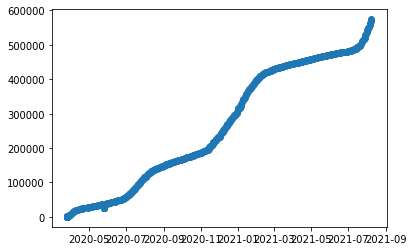

In [12]:
plt.scatter(la_case['date'],la_case['tot_cases'])

<AxesSubplot:xlabel='date'>

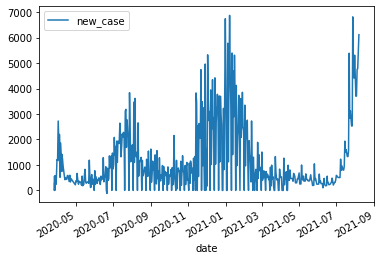

In [13]:
la_case.plot('date','new_case')

In [14]:
la_case.sort_values(by='date', inplace=True)

In [15]:
la_case['seven_day_case_avg'] = la_case['new_case'].rolling(7,1).mean()

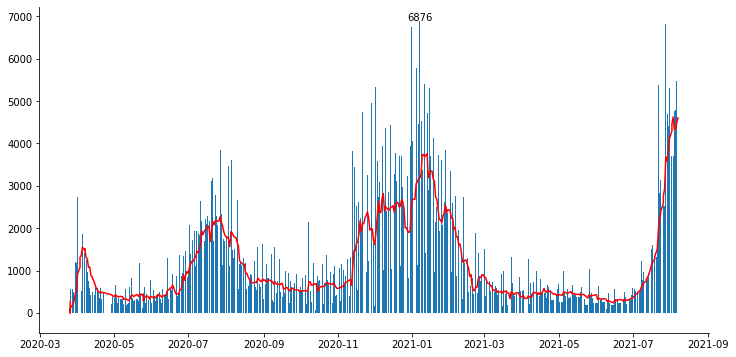

In [16]:
fig,ax = plt.subplots(figsize=(12,6))

p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.bar(la_case['date'].dt.date, la_case['new_case'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case['new_case'].max()
peak_date = la_case.loc[la_case['new_case'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+20), ha='center')

plt.show()

In [17]:
import datetime as dt

In [18]:
offset_date = dt.date.today()-dt.timedelta(90)

In [19]:
la_case_3m = la_case[la_case['date'].dt.date>offset_date].copy()

In [20]:
la_case.iloc[0]

submission_date          2020-03-22T00:00:00.000
state                                         LA
tot_cases                                   1035
conf_cases                                   NaN
prob_cases                                   NaN
new_case                                     272
pnew_case                                    NaN
tot_death                                     29
conf_death                                   NaN
prob_death                                   NaN
new_death                                      9
pnew_death                                   NaN
created_at            2020-03-26 16:22:39.452000
consent_cases                          Not agree
consent_deaths                             Agree
date                  2020-03-26 16:22:39.452000
seven_day_case_avg                           272
Name: 7670, dtype: object

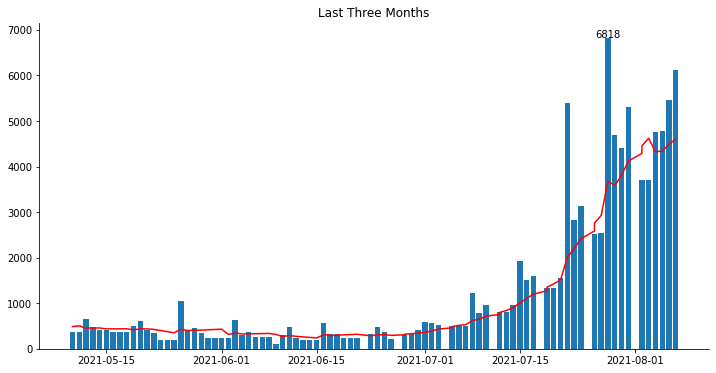

In [21]:
fig,ax = plt.subplots(figsize=(12,6))

p1 = ax.plot(la_case_3m['date'].dt.date, la_case_3m['seven_day_case_avg'], c='r')
b1 = ax.bar(la_case_3m['date'].dt.date, la_case_3m['new_case'])

ax.set_title('Last Three Months')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case_3m['new_case'].max()
peak_date = la_case_3m.loc[la_case_3m['new_case'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+10), ha='center')

plt.show()

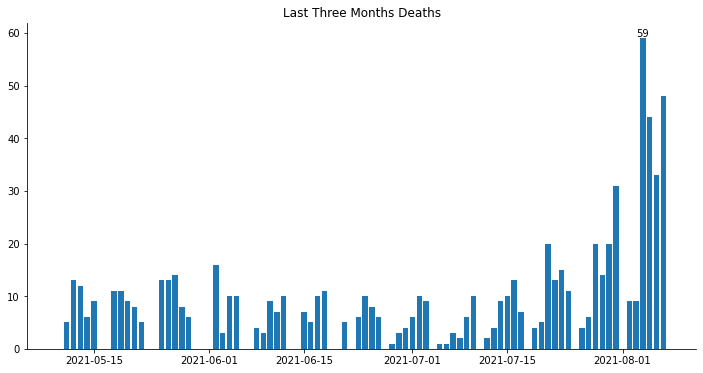

In [22]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case_3m['date'].dt.date, la_case_3m['seven_day_case_avg'], c='k')
b1 = ax.bar(la_case_3m['date'].dt.date, la_case_3m['new_death'])

ax.set_title('Last Three Months Deaths')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case_3m['new_death'].max()
peak_date = la_case_3m.loc[la_case_3m['new_death'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+.25), ha='center')

plt.show()

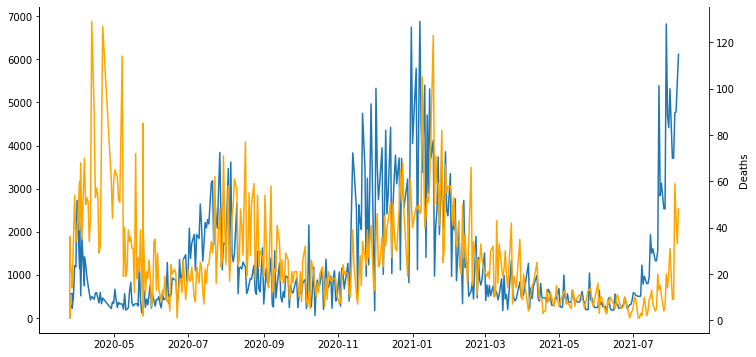

In [36]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.plot(la_case[la_case['new_case']>0]['date'].dt.date, la_case[la_case['new_case']>0]['new_case'])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
b2 = ax2.plot(la_case[la_case['new_death']>0]['date'].dt.date, la_case[la_case['new_death']>0]['new_death'], c='orange')
ax2.set_ylabel("Deaths")

ax2.spines['top'].set_visible(False)

plt.show()

In [24]:
from sklearn.preprocessing import scale

In [25]:
la_case_death = la_case[['new_case','new_death']]
la_case_death.describe()

,new_case,new_death
count,563.000000,563.000000
mean,1018.541741,19.911190
std,1279.164585,21.494498
min,-119.000000,-21.000000
25%,228.000000,2.000000
50%,525.000000,14.000000
75%,1267.000000,30.000000
max,6876.000000,129.000000


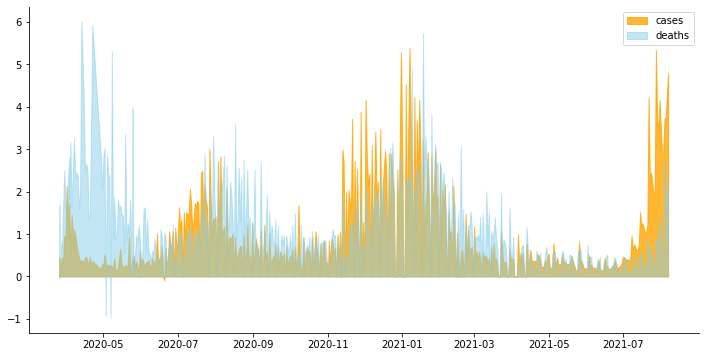

In [26]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.fill_between(la_case['date'].dt.date, scale(la_case['new_case'],with_mean=False),
                     color='orange', alpha=0.8, label='cases')
b2 = ax.fill_between(la_case['date'].dt.date, scale(la_case['new_death'],with_mean=False),
                     color='skyblue', alpha=0.5, label='deaths')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

plt.show()

In [27]:
la_case[['date','new_case','new_death']].tail(30)

,date,new_case,new_death
6763,2021-07-09 13:56:56.578,786,6
8945,2021-07-10 14:17:36.847,969,10
31271,2021-07-12 13:16:46.339,797,2
9346,2021-07-12 14:22:55.239,797,2
6538,2021-07-13 14:26:25.742,799,4
7061,2021-07-14 14:14:34.461,953,9
9562,2021-07-15 14:29:47.308,1936,10
6935,2021-07-16 14:03:13.679,1500,13
32417,2021-07-17 13:43:02.763,1605,7
8470,2021-07-19 13:20:07.101,1328,4
